In [1]:
#Data cleaning and Data preprocessing
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [4]:
df.isna().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [5]:
df.nunique()

index                37500
beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37482
review/timeStruct    37490
review/timeUnix      37490
user/ageInSeconds     1471
user/birthdayRaw      1432
user/birthdayUnix     1432
user/gender              2
user/profileName      7441
dtype: int64

In [6]:
col=["index","review/timeStruct","review/timeUnix","user/ageInSeconds","user/birthdayRaw","user/birthdayUnix","user/profileName"]
df1=df.drop(columns=col)
df1.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,NaN
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,NaN
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,Male
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,Male
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,NaN


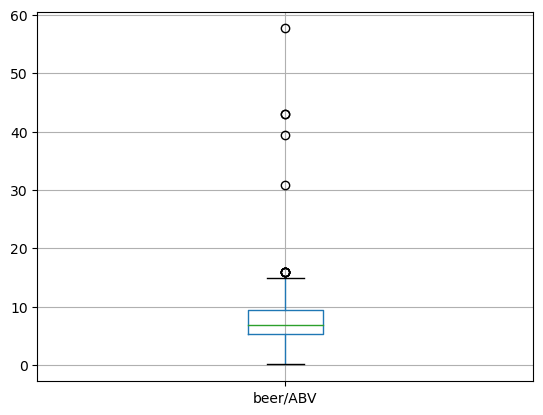

In [7]:
df.boxplot(column='beer/ABV')
plt.show()

In [8]:
Q1 = df1['beer/ABV'].quantile(0.25)
Q3 = df1['beer/ABV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df1['beer/ABV'] < lower_bound) | (df1['beer/ABV'] > upper_bound)

df1[outliers]

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender
6436,39.44,55712,6513,SchorschbrÃ¤u Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,3.5,Very lucky to get a 2oz sample of this at a ta...,Male
6668,16.00,47421,6513,Schorschbock,Doppelbock,3.0,3.5,4.0,3.5,4.0,I just had a 0.33l bottle of this rather extre...,Male
14547,16.00,47421,6513,Schorschbock,Doppelbock,5.0,3.0,3.0,3.0,3.5,"I'm not reviewing this as a Doppelbock, but a ...",NaN
22617,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,4.5,"The bottle looks really great, handnumbered an...",NaN
25416,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,4.0,43% ABV - this is so crazy!\t\tA: Pour is warm...,NaN
26618,16.00,45774,395,Jeffersons Reserve Big Fella Bourbon Barrel Stout,American Double / Imperial Stout,3.5,3.5,3.5,4.0,3.5,"Big Fellow, the typical Jefferson Reserve Bour...",NaN
28707,16.00,47421,6513,Schorschbock,Doppelbock,3.0,3.5,4.0,3.0,4.0,I would agree with the previous review - hard ...,NaN
28801,16.00,71004,6513,Schorsch Weizen 16%,Weizenbock,2.5,3.5,4.0,4.0,4.0,I had to buy this beer when I saw that it boas...,NaN
31094,16.00,47421,6513,Schorschbock,Doppelbock,3.0,3.0,3.5,3.0,3.5,"A viscous, dark brown beer is poured into my g...",NaN
33166,57.70,73368,6513,SchorschbrÃ¤u Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,3.5,"New world strongest beer. Very limited, only 3...",NaN


In [9]:
df1.nunique()

beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37482
user/gender              2
dtype: int64

In [10]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder

In [11]:
le_name=LabelEncoder()
le_style=LabelEncoder()
le_gender=LabelEncoder()

In [12]:
df1['beer/name_n']=le_name.fit_transform(df1['beer/name'])
df1['beer/style_n']=le_style.fit_transform(df1['beer/style'])
df1['user/gender']=le_style.fit_transform(df1['user/gender'])

In [13]:
df1.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender,beer/name_n,beer/style_n
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,2,368,61
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,2,153,4
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1,1044,14
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1,1174,35
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,2,230,46


In [14]:
df2=df1.drop(['beer/name','beer/style'],axis=1)
df2.head()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender,beer/name_n,beer/style_n
0,5.0,46634,14338,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,2,368,61
1,11.0,3003,395,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,2,153,4
2,4.7,961,365,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1,1044,14
3,4.4,429,1,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1,1174,35
4,4.4,4904,1417,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,2,230,46


In [15]:
df['user/gender'].mode()

0    Male
Name: user/gender, dtype: object

In [16]:
df2['user/gender'] = df2['user/gender'].replace(2,1)

In [17]:
df2.isna().count()

beer/ABV             37500
beer/beerId          37500
beer/brewerId        37500
review/appearance    37500
review/aroma         37500
review/overall       37500
review/palate        37500
review/taste         37500
review/text          37500
user/gender          37500
beer/name_n          37500
beer/style_n         37500
dtype: int64

In [18]:
df2['beer/ABV'] = df2['beer/ABV'].round().astype(int)
df2['review/appearance'] = df2['review/appearance'].round().astype(int)
df2['review/aroma'] = df2['review/aroma'].round().astype(int)
df2['review/palate'] = df2['review/palate'].round().astype(int)
df2['review/taste'] = df2['review/taste'].round().astype(int)
df2['review/overall'] = df2['review/overall'].round().astype(int)

In [19]:
df2.head()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/gender,beer/name_n,beer/style_n
0,5,46634,14338,4,4,4,4,4,Pours a clouded gold with a thin white head. N...,1,368,61
1,11,3003,395,4,4,4,4,3,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1,153,4
2,5,961,365,4,4,4,4,4,First enjoyed at the brewpub about 2 years ago...,1,1044,14
3,4,429,1,3,3,2,3,3,First thing I noticed after pouring from green...,1,1174,35
4,4,4904,1417,4,3,3,4,2,A: pours an amber with a one finger head but o...,1,230,46


In [20]:
df2.nunique()

beer/ABV                20
beer/beerId           1731
beer/brewerId          212
review/appearance        6
review/aroma             5
review/overall           6
review/palate            5
review/taste             5
review/text          37482
user/gender              2
beer/name_n           1688
beer/style_n            95
dtype: int64

In [21]:
X=df2.drop(['beer/beerId','review/text','review/overall'],axis=1)
y=df2['review/overall']

In [22]:
X.head()

,beer/ABV,beer/brewerId,review/appearance,review/aroma,review/palate,review/taste,user/gender,beer/name_n,beer/style_n
0,5,14338,4,4,4,4,1,368,61
1,11,395,4,4,4,3,1,153,4
2,5,365,4,4,4,4,1,1044,14
3,4,1,3,3,3,3,1,1174,35
4,4,1417,4,3,4,2,1,230,46


In [23]:
#Modelling using 1-2 ML models
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [26]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
X_train

,beer/ABV,beer/brewerId,review/appearance,review/aroma,review/palate,review/taste,user/gender,beer/name_n,beer/style_n
3459,4,1417,4,4,4,4,1,230,46
9819,6,16386,4,3,4,4,1,814,14
37049,8,24445,4,4,4,4,1,991,9
10045,9,3282,4,4,4,5,1,924,26
9350,13,14,4,5,4,4,1,167,20
...,...,...,...,...,...,...,...,...,...
29967,11,1199,4,5,4,5,1,615,11
25935,6,3268,3,3,4,4,1,19,12
22457,8,395,4,4,4,4,1,1283,12
22464,6,3268,4,3,4,4,1,218,5


In [28]:
y_pred=model.predict(X_test)

In [29]:
model.score(X_test,y_test)

0.7693333333333333

In [30]:
from sklearn import tree

In [31]:
model1 = tree.DecisionTreeClassifier()

In [32]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred1=model1.predict(X_test)

In [34]:
model1.score(X_test,y_test)

0.7997333333333333

In [35]:
#2-3 Model Validation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("For Logistic Regression")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

For Logistic Regression
Mean Squared Error: 0.46053333333333335
R-squared: -0.05459054041444977


In [36]:
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("For Decision Tree")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

For Decision Tree
Mean Squared Error: 0.2637333333333333
R-squared: 0.39606830082808875


In [37]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=40)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [38]:
model2.score(X_test,y_test)

0.8144

In [39]:
y2_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2_pred)
cm

array([[   0,    0,    0,   20,    0],
       [   0,    0,    0,  234,    0],
       [   0,    0,    0,  331,    0],
       [   0,    0,    0, 2885,    0],
       [   0,    0,    0,  280,    0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

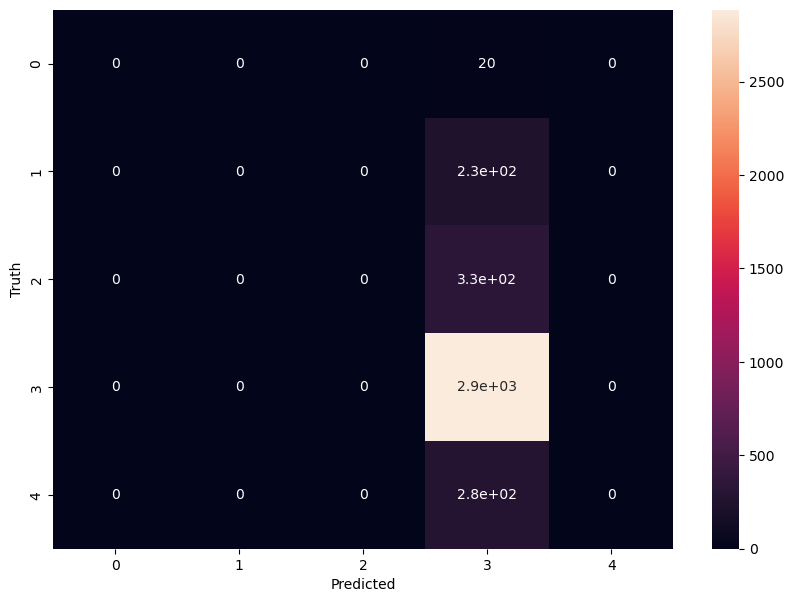

In [41]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
#Additional
#Any 'beer/name' that strongly predict the overall rating of the beer
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(LogisticRegression(max_iter=1000),df2[['beer/name_n']],df2['review/overall'],cv=3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.7756, 0.7756, 0.7756])

In [45]:
cross_val_score(tree.DecisionTreeClassifier(),df2[['beer/name_n']],df2['review/overall'],cv=3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.76952, 0.76832, 0.77064])

In [46]:
cross_val_score(RandomForestClassifier(n_estimators=40),df2[['beer/name_n']],df2['review/overall'],cv=3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.77256, 0.77064, 0.77168])